In [1]:
import pandas as pd
import math
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
from sklearn import mixture

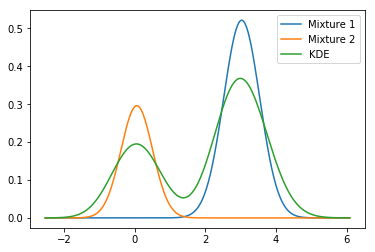

In [2]:
#fit mixture model
obs = np.concatenate((np.random.normal(loc=0.0, scale=0.5, size=100), np.random.normal(loc=3.0, scale=.5, size=200)))
g = mixture.GaussianMixture(n_components=2)
g.fit(obs.reshape(300,1))

#do kernel estimation
dens = sm.nonparametric.KDEUnivariate(obs)
dens.fit()

#draw mixture model
comp1 = g.weights_[0]*stats.norm.pdf(dens.support,g.means_[0,0],g.covariances_[0,0]**.5)
comp2 = g.weights_[1]*stats.norm.pdf(dens.support,g.means_[1,0],g.covariances_[1,0]**.5)

plt.plot(dens.support, comp1, label='Mixture 1')
plt.plot(dens.support, comp2, label='Mixture 2')
plt.plot(dens.support, dens.density, label='KDE')
plt.legend()
plt.show()

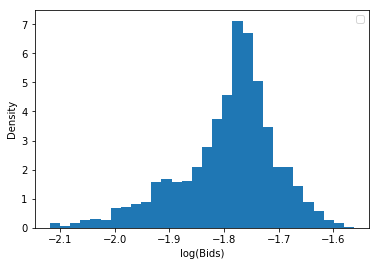

In [3]:
#load data
data = pd.read_csv('data/clean_milk1.csv')
bids = np.array(data['LSCORE'])

#log transformation/ ignore outlier for the plot
bids = bids[ (.12<=np.exp(bids)) & (np.exp(bids)<=.21) ]

#do kernel density estimation
dens = sm.nonparametric.KDEUnivariate(bids)
dens.fit()

#plt.plot(dens.support, dens.density, label='KDE')
plt.hist(bids, 30,density=True)
plt.xlabel('log(Bids)')
plt.ylabel('Density')
plt.legend()
plt.savefig('results/bids_density.png')
plt.show()

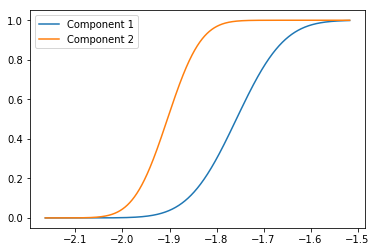

In [4]:
#fit mixture model
g = mixture.GaussianMixture(n_components=2)
g.fit(bids.reshape(bids.shape[0],1))

#first see stocahstic dominance
comp1_cdf = stats.norm.cdf(dens.support,g.means_[0,0],g.covariances_[1,0]**.5)
comp2_cdf = stats.norm.cdf(dens.support,g.means_[1,0],g.covariances_[0,0]**.5)

plt.plot(dens.support, comp1_cdf, label='Component 1')
plt.plot(dens.support, comp2_cdf, label='Component 2')
plt.legend()
plt.show()

In [5]:
#create a table?

print(np.exp(g.means_[0,0]), np.exp(g.means_[1,0]))
print( 'Means: %s'%g.means_[:,0])
print( 'exp Means: %s'%np.exp(g.means_[:,0]))
print( 'Var: %s'%g.covariances_[:,0,0]**.5)
print( 'Weights: %s'%g.weights_)

(0.17243769707965512, 0.14890257666167164)
Means: [-1.75771928 -1.90446303]
exp Means: [0.1724377  0.14890258]
Var: [0.05629529 0.08028227]
Weights: [0.75796196 0.24203804]


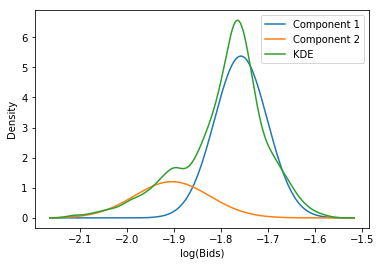

In [6]:
#graph kernel with mixture components
comp1 = g.weights_[0]*stats.norm.pdf(dens.support,g.means_[0,0],g.covariances_[0,0]**.5)
comp2 = g.weights_[1]*stats.norm.pdf(dens.support,g.means_[1,0],g.covariances_[1,0]**.5)

plt.plot(dens.support, comp1, label='Component 1')
plt.plot(dens.support, comp2, label='Component 2')
plt.xlabel('log(Bids)')
plt.ylabel('Density')
plt.plot(dens.support, dens.density, label='KDE')
plt.legend()
plt.savefig('results/bid_mixture.png')
plt.show()

In [7]:
data = pd.read_csv('data/clean_milk1.csv')
wbids = data[data['WIN']==1]
wbids = np.array(wbids['LSCORE'])
wbids = wbids[ (.12<=np.exp(wbids)) & (np.exp(wbids)<=.21) ]
g = mixture.GaussianMixture(n_components=2)
g.fit(wbids.reshape(wbids.shape[0],1))

print( 'Means: %s'%g.means_[:,0])
print( 'Means: %s'%np.exp(g.means_[:,0]))
print( 'Var: %s'%(g.covariances_[:,0,0])**.5)
print( 'Weights: %s'%g.weights_)

Means: [-1.92882137 -1.78941106]
Means: [0.14531937 0.16705853]
Var: [0.06573236 0.04023215]
Weights: [0.29081307 0.70918693]


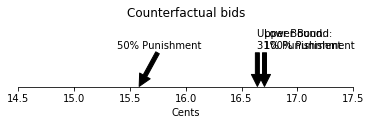

In [8]:
ax = plt.subplot(3,1,1)

ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_major_locator(ticker.NullLocator())
ax.set_xlim(14.5, 17.5)
ax.set_ylim(0, 5)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.title('Counterfactual bids')
plt.xlabel('Cents')

lb =np.exp(g.means_[1,0])*100
ub = np.exp(bids.mean())*100
mid = np.exp(.5*g.means_[0,0] + .5*g.means_[1,0])*100

ax.annotate('Lower Bound:\n100% Punishment', xy=(lb,0), xytext=(lb,3), 
            arrowprops=dict(facecolor='black', shrink=0.01) )

ax.annotate('Upper Bound:\n31% Punishment', xy=(ub,0), xytext=(ub,3), 
            arrowprops=dict(facecolor='black', shrink=0.01) )

ax.annotate('50% Punishment', xy=(mid,0), xytext=(mid-.2,3), 
            arrowprops=dict(facecolor='black', shrink=0.01) )

#plt.savefig('results/cf_analysis.png', bbox_inches = 'tight')
plt.show()

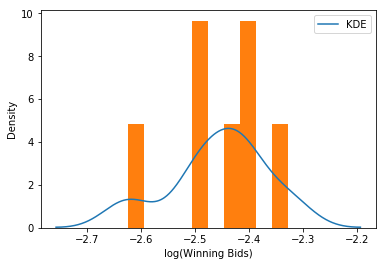

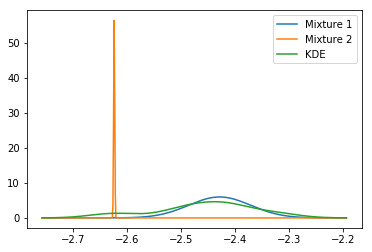

In [9]:
data  = pd.read_csv('data/milk.csv')
wbids = data['SCORE'][data['WIN']==1]
lwbids = np.array(np.log(wbids[ (wbids<=.1) & (wbids<=.21) ]))


dens = sm.nonparametric.KDEUnivariate(lwbids)
dens.fit()

plt.plot(dens.support, dens.density, label='KDE')
plt.hist(lwbids,10,density=True)
plt.xlabel('log(Winning Bids)')
plt.ylabel('Density')
plt.legend()
plt.show()

g = mixture.GaussianMixture(n_components=2)
g.fit(lwbids.reshape(lwbids.shape[0],1))

#print 'Means: %s'%g.means_[:,0]
#print 'Var: %s'%g.covariances_[:,0,0]
#print 'Weights: %s'%g.weights_

#first see stocahstic dominance
comp1 = g.weights_[0]*stats.norm.pdf(dens.support,g.means_[0,0],g.covariances_[0,0]**.5)
comp2 = g.weights_[1]*stats.norm.pdf(dens.support,g.means_[1,0],g.covariances_[1,0]**.5)

plt.plot(dens.support, comp1, label='Mixture 1')
plt.plot(dens.support, comp2, label='Mixture 2')
plt.plot(dens.support, dens.density, label='KDE')
plt.legend()
plt.show()

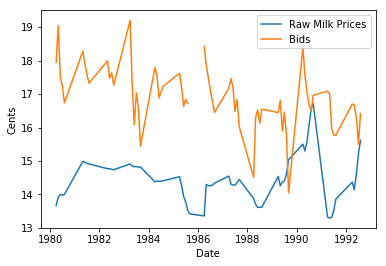

In [10]:
#summary statistics
rawdata = pd.read_csv('data/milk.csv')
data= rawdata.copy()

#general house keeping
data = data[ (data['YEAR']>=1980) & (data['DAY'] !=0) & (data['MONTH'] >=4)  & (data['MONTH'] <=9) ]
data = data.sort_values(['YEAR','MONTH','DAY'])

plot_points = data.groupby(['YEAR','MONTH'],as_index=False).mean()
labels = plot_points['MONTH'].astype(str) + '/'+ plot_points['YEAR'].astype(str)
labels = pd.to_datetime(labels,infer_datetime_format=True)

plt.plot(labels,plot_points['FMO'], label='Raw Milk Prices')
plt.plot(labels,plot_points['SCORE']*100, label='Bids')
plt.xlabel('Date')
plt.ylabel('Cents')
plt.legend()
plt.savefig('results/milk_vs_time.png')

plt.show()

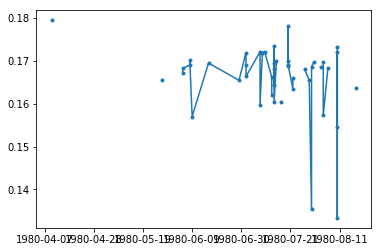

In [11]:
auct_key = ['YEAR','MONTH','DAY','SYSTEM','FMOZONE']
min_lag = data.groupby(auct_key, as_index=False).min()
cool_thing = min_lag[min_lag['YEAR']==1980]

labels = (cool_thing['MONTH'].astype(str) + '/'+
          cool_thing['DAY'].astype(str) + '/' + cool_thing['YEAR'].astype(str))
labels = pd.to_datetime(labels,infer_datetime_format=True)

plt.plot(labels, cool_thing['SCORE'],marker='.')

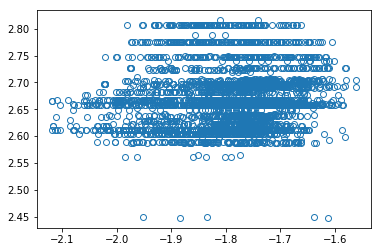

In [12]:
data = pd.read_csv('data/milk.csv')

reg1 = data[['SCORE','FMO']].dropna()
reg1 = np.log(reg1[(.12<=reg1['SCORE']) & (reg1['SCORE']<=.21)])
plt.plot(reg1['SCORE'],reg1['FMO'],'o',mfc='none')